# AGUME KENNETH B30309

- Getting the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

- Loading the dataset

In [13]:
data = pd.read_csv("faang_stock_prices.csv")
data.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


- Displaying the info of the dataset

In [19]:
print(f"\nDataset loaded successfully!")
print(f"Shape: {data.shape[0]} rows, {data.shape[1]} columns")
print(f"Date range: {data['Date'].iloc[0]} to {data['Date'].iloc[-1]}")


Dataset loaded successfully!
Shape: 14964 rows, 19 columns
Date range: 2016-02-23 to 2026-01-22


- Testing staionarity

In [ ]:
# Get the Open column
open_prices = data['Open']

# Perform Augmented Dickey-Fuller test
result = adfuller(open_prices)

# Display results clearly
print(f"\nADF Statistic: {result[0]:.6f}")
print(f" p-value: {result[1]:.6f}")
print("\n Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.3f}")


ADF Statistic: 0.612855
 p-value: 0.987928

 Critical Values:
   1%: -3.431
   5%: -2.862
   10%: -2.567


In [22]:
# Simple interpretation
print("\nINTERPRETATION:")
if result[1] <= 0.05:
    print("The 'Open' variable IS STATIONARY")
    print(" (p-value ≤ 0.05 → reject null hypothesis of non-stationarity)")
else:
    print("The 'Open' variable IS NOT STATIONARY")
    print("p-value > 0.05 → cannot reject null hypothesis)")


INTERPRETATION:
The 'Open' variable IS NOT STATIONARY
p-value > 0.05 → cannot reject null hypothesis)


- Visualization

- ACF PLOT FOR 'Close' VARIABLE

<Figure size 1200x500 with 0 Axes>

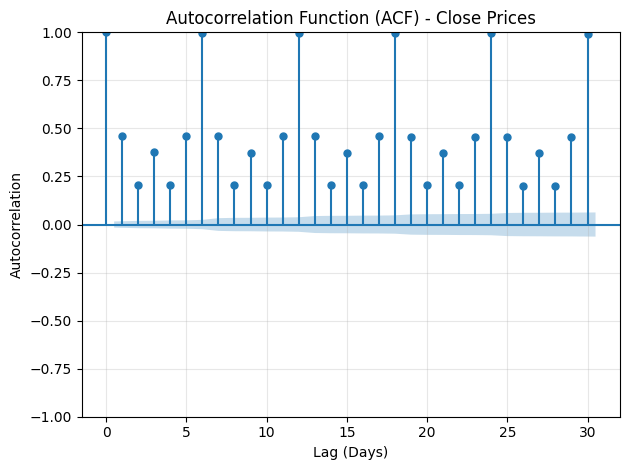

In [26]:
# Get Close column
close_prices = data['Close']

# Create ACF plot
plt.figure(figsize=(12, 5))
plot_acf(close_prices, lags=30, alpha=0.05, title='Autocorrelation Function (ACF) - Close Prices')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('acf_close.png', dpi=100)
plt.show()

The ACF plot shows very high autocorrelation that declines slowly over many lags.
This indicates:
1. Strong positive relationship between current and past prices
2. The series has a trend (non-stationary)
3. Past prices are good predictors of future prices
All bars beyond lag 0 are statistically significant as they exceed the confidence bounds.